In [1]:
def find_all_max_locations_in_timeslices(cube):
    """
    Finds the maximum value in each timeslice and returns all its locations.
    
    Args:
        cube (iris.cube.Cube): The Iris cube to analyze.

    Returns:
        list: Each element is a tuple containing the timeslice index, maximum value, 
              and a list of coordinates where the maximum occurs.
    """
    results = []
    time_dimension = 0  # Adjust if your time dimension is not the first dimension
    
    # Iterate over each timeslice
    for i, timeslice in enumerate(cube.slices_over(time_dimension)):
        max_value = np.max(timeslice.data)
        # Find all positions where the timeslice data equals the maximum value
        positions = np.argwhere(timeslice.data == max_value)
        
        # Get the corresponding latitude and longitude for each position
        max_locations = []
        for pos in positions:
            latitude = timeslice.coord('projection_y_coordinate').points[pos[0]]
            longitude = timeslice.coord('projection_x_coordinate').points[pos[1]]
            max_locations.append((latitude, longitude))
        
        # Store the results
        results.append((i, max_value, max_locations))
    
    return results


In [2]:
import iris
import glob
import iris.plot as iplt
import iris.quickplot as qplt
import datetime as datetime
import iris.coord_categorisation as cat
import sys
import numpy as np
import pandas as pd

In [3]:
year=2012
radardir = f'/nfs/a161/gy17m2a/PhD/datadir/NIMROD/5mins/OriginalFormat_1km/{year}/'
file_list=glob.glob(radardir +"*.nc")
sorted_list = sorted(file_list)

In [5]:
# fill_value = 9.96921e+36
# mask = day_cube.data == fill_value

# # Replace these values with np.nan
# day_cube.data = np.ma.masked_where(mask, day_cube.data).filled(np.nan)

In [7]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Create path to files containing functions
root_fp = "/nfs/a319/gy17m2a/PhD/"
sys.path.insert(0, root_fp + 'Scripts/GlobalFunctions')
from Spatial_plotting_functions import *
from Spatial_geometry_functions import *
gb_gdf = create_gb_outline({'init' :'epsg:3857'})

In [8]:
# accumulated_cube = trim_to_bbox_of_region_obs(accumulated_cube, gb_gdf, 'projection_y_coordinate', 'projection_x_coordinate')
# accumulated_cube

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coord_systems.py:531: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  globe=globe,


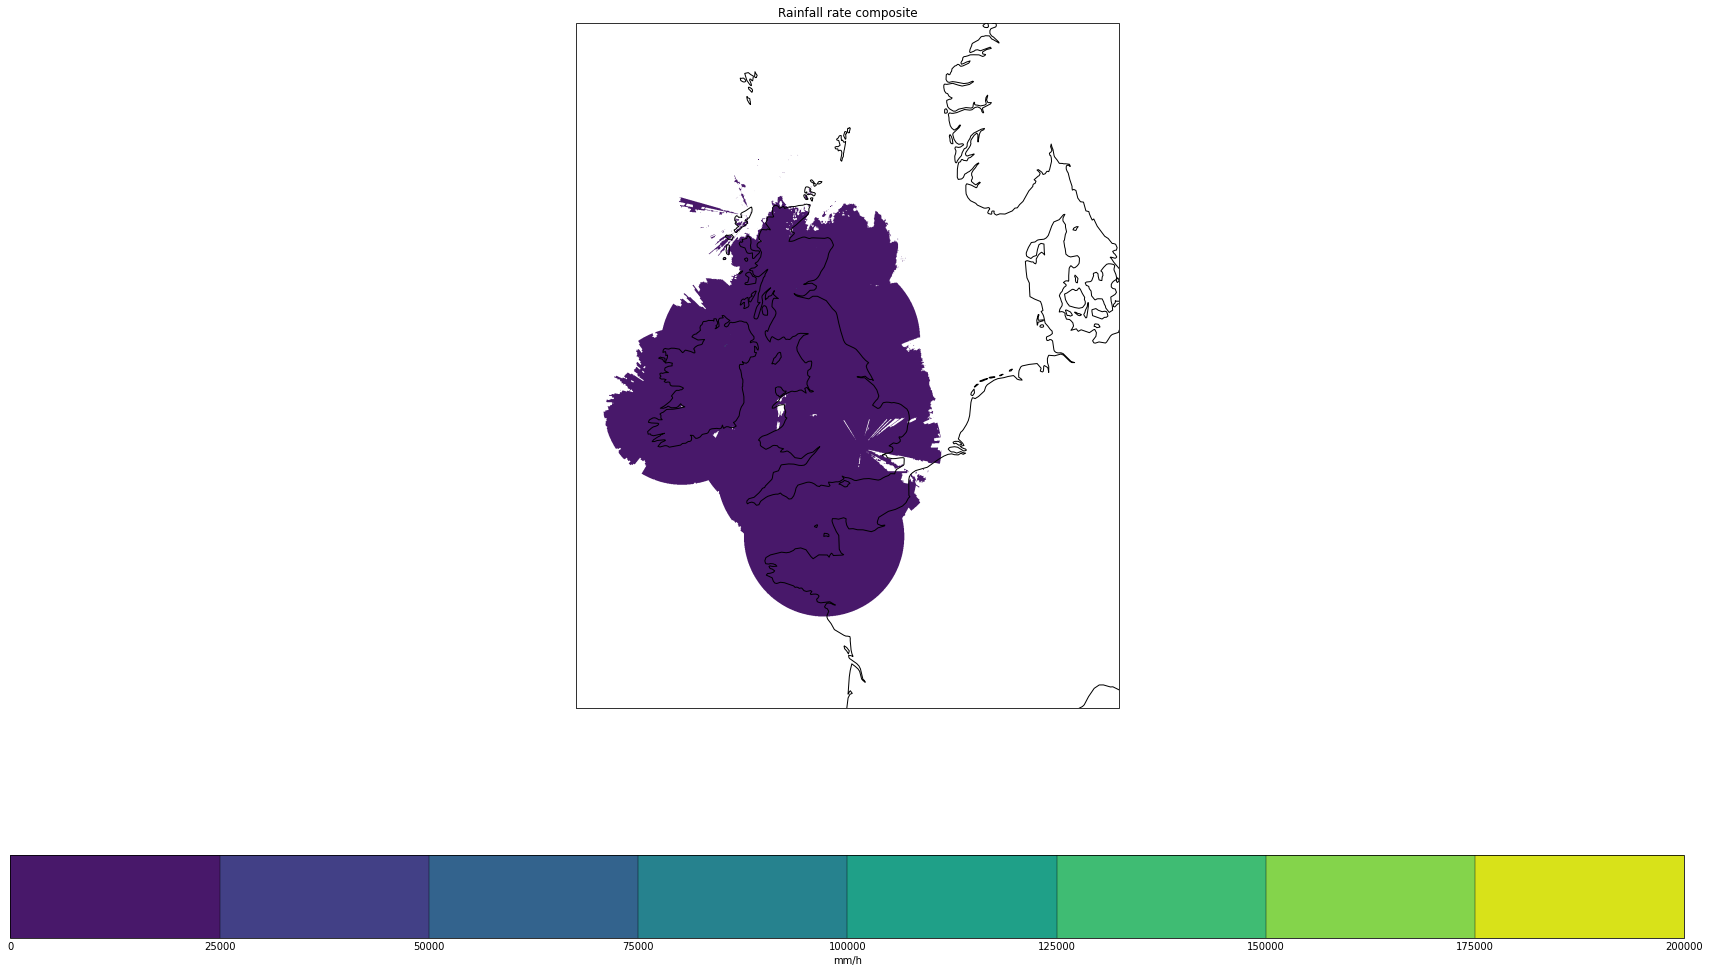

In [125]:
import iris
import numpy as np

# Assume da_cube is already loaded and is your Iris cube
# cube_slice = day_cube[10,:,:]
cube_slice=accumulated_cube.copy()

# Mask values where data is below 10
cube_slice.data = np.ma.masked_less(cube_slice.data, 500)

import iris.quickplot as qplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a plot
plt.figure(figsize=(30, 18))
qplt.contourf(cube_slice, cmap='viridis')  # Adjust the colormap as needed

# Add coastlines with Cartopy
plt.gca().coastlines()

# plt.colorbar(cf, orientation='vertical')  # Add a colorbar
plt.show()


/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coord_systems.py:531: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  globe=globe,


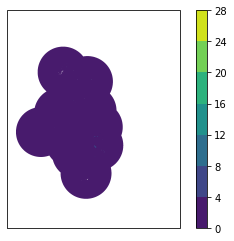

In [59]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'cube' is your loaded Iris cube with some data
# Apply a mask where some condition is met (for example, data values less than a threshold)
masked_data = np.ma.masked_less(day_cube[1,:,:].data, 20)
day_cube[1,:,:].data = masked_data

# Plot using qplt.contourf
contour = iplt.contourf(day_cube[1,:,:])
plt.colorbar(contour)  # Add a colorbar to show the data scale

ax.coastlines()


plt.show()  # Display the plot



/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coord_systems.py:531: UserWarning: The default value for the *approx* keyword argument to TransverseMercator will change from True to False after 0.18.
  globe=globe,


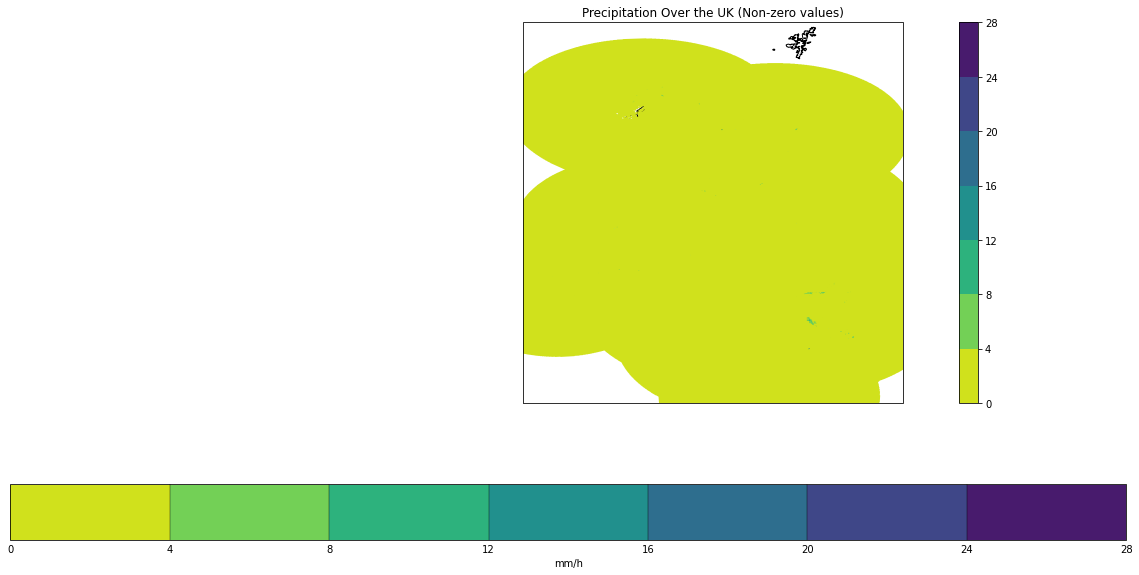

In [33]:
# np.nanmin(day_cube[1,:,:].data)
# iplt.contourf(day_cube[1,:,:])

day_cube[1,:,:].data = ma.masked_equal(day_cube[1,:,:].data, 0)
day_cube[1,:,:].data = np.ma.masked_where(day_cube[1,:,:].data < 5, day_cube[1,:,:].data)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 2, 49, 61], crs=ccrs.PlateCarree())  # Zoom in on the UK
ax.coastlines()

# Use Iris' quickplot for easy plotting
qplt.contourf(day_cube[1,:,:], cmap='viridis_r')  # Indexing [0] for the first time point, adjust as necessary
plt.title('Precipitation Over the UK (Non-zero values)')
plt.colorbar(orientation='vertical')
plt.show()

In [ ]:
# for i in range(0,len(sorted_list)):
#     print(i)
#     ### Load radar data for one day (using IRIS)
#     day_cube = iris.load_cube(sorted_list[i])
#     print(np.nanmax(day_cube.data))

### Check for repeated occurrence of value

In [5]:
for i in range(0,5):
    day_cube = iris.load_cube(sorted_list[i])
    numbers, counts = np.unique(day_cube.data.data, return_counts=True)
    df=pd.DataFrame({'numbers':numbers, 'counts':counts})
    df = df.sort_values(by='numbers', ascending=False)
    print(df[:3])

           numbers     counts
1467  9.969210e+36  768143373
1466  1.023969e+03        222
1465  1.015344e+03          1
           numbers     counts
4690  9.969210e+36  769132051
4689  1.023969e+03         36
4688  1.018750e+03          1
           numbers     counts
1719  9.969210e+36  770928656
1718  1.023969e+03          9
1717  9.740625e+02          1


KeyboardInterrupt: 

### Check spatial/temporal occurrence of value

In [84]:
day_cube = iris.load_cube(sorted_list[2])

In [6]:
global_max_value = np.nanmax(day_cube.data)

In [12]:
# Example usage
max_values_and_all_locations = find_all_max_locations_in_timeslices(day_cube)
for result in max_values_and_all_locations:
    print(f"Timeslice Index: {result[0]}, Max Value: {result[1]}, Locations: {result[2]}")

Timeslice Index: 0, Max Value: 91.84375, Locations: [(-132500.0, 601500.0)]
Timeslice Index: 1, Max Value: 75.625, Locations: [(-155500.0, 610500.0)]
Timeslice Index: 2, Max Value: 58.40625, Locations: [(524500.0, 69500.0)]
Timeslice Index: 3, Max Value: 52.40625, Locations: [(-154500.0, 616500.0)]
Timeslice Index: 4, Max Value: 52.4375, Locations: [(-146500.0, 623500.0)]
Timeslice Index: 5, Max Value: 54.59375, Locations: [(-148500.0, 624500.0), (-148500.0, 625500.0), (-147500.0, 625500.0), (-146500.0, 625500.0), (-145500.0, 625500.0), (-145500.0, 626500.0)]
Timeslice Index: 6, Max Value: 89.21875, Locations: [(-137500.0, 559500.0)]
Timeslice Index: 7, Max Value: 68.6875, Locations: [(-134500.0, 561500.0)]
Timeslice Index: 8, Max Value: 139.59375, Locations: [(524500.0, 69500.0)]
Timeslice Index: 9, Max Value: 42.1875, Locations: [(-194500.0, 594500.0)]
Timeslice Index: 10, Max Value: 48.65625, Locations: [(524500.0, 69500.0)]
Timeslice Index: 11, Max Value: 44.25, Locations: [(524500

In [ ]:
# # day_cube#95500.0, 457500.0
# # day_cube[day_cube['projection_coordinate'] == 95500]

# y_constraint = iris.Constraint(projection_y_coordinate=lambda y: y == 95500.0)
# x_constraint = iris.Constraint(projection_x_coordinate=lambda x: x == 457500.0)

# constrained_cube = day_cube.extract(y_constraint & x_constraint)

# # Flatten the data to a one-dimensional array
# data_flat = constrained_cube.data.flatten()

# # Sort the data in descending order
# data_sorted_desc = np.sort(data_flat)[::-1]

# # Print the sorted data
# print(data_sorted_desc)


In [8]:
# for entry in max_values_and_all_locations:
#     if entry[1] == global_max_value:
#         print(f"Timeslice Index: {entry[0]}, Max Value: {entry[1]}, Location: (Lat: {entry[2]}, Lon: {entry[3]})")

# Part 2: find cells where there are lots of high values

In [123]:
import iris
import glob
import numpy as np
from scipy import stats

# Define the directory and create a sorted list of file paths
year = 2012
radardir = f'/nfs/a161/gy17m2a/PhD/datadir/NIMROD/5mins/OriginalFormat_1km/{year}/'
file_list = glob.glob(radardir + "*.nc")
sorted_list = sorted(file_list)

# Load the cubes
cubes = iris.load(sorted_list[:30])

# Concatenate into a single cube
monthly_cube = cubes.concatenate_cube()

# Assuming the time dimension is the first dimension
accumulated_cube = monthly_cube.collapsed('time', iris.analysis.SUM)

/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/nfs/a321/gy17m2a/anaconda_install/anaconda3/envs/ukcp18/lib/python3.7/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_reference_time'.
  warnings.warn(msg.format(self.name()))


In [ ]:
# cubes = iris.load(sorted_list)
# yearly_cube = cubes.concatenate_cube()

### Sum over time

In [60]:
data_sorted_desc = np.sort(accum_data_flat.data)[::-1]
data_sorted_desc[:30]

array([179373.12 , 143786.06 ,  97689.25 ,  87672.53 ,  76027.03 ,
        76000.09 ,  72193.91 ,  65293.25 ,  65148.156,  61023.656,
        55669.97 ,  53700.78 ,  52444.   ,  52325.625,  52325.03 ,
        45329.156,  44527.78 ,  44190.438,  44075.812,  36364.938,
        31203.188,  31119.844,  30162.156,  29983.25 ,  29225.   ,
        28448.438,  26905.   ,  26678.281,  26105.031,  26038.062],
      dtype=float32)

### Find values over whole month at cells we know to have high values for one timeslice

In [65]:
# day_cube#95500.0, 457500.0
# day_cube[day_cube['projection_coordinate'] == 95500]

y_constraint = iris.Constraint(projection_y_coordinate=lambda y: y == 86500.0)
x_constraint = iris.Constraint(projection_x_coordinate=lambda x: x == 471500.0)
constrained_cube2 = yearly_cube.extract(y_constraint & x_constraint)

# Flatten the data to a one-dimensional array
data2_flat = constrained_cube2.data.flatten()

# Sort the data in descending order
data_sorted_desc = np.sort(data_flat)[::-1]

# Print the sorted data
print(data_sorted_desc)

[1023.96875 1023.96875 1023.96875 ...    0.         0.         0.     ]


In [68]:
test = pd.DataFrame({'data':data2_flat, 'index':range(0,len(data2_flat))})
test.sort_values(by='data', ascending=False)[:30]

,data,index
10067,1023.96875,10067
11765,555.68750,11765
13806,512.53125,13806
857,466.40625,857
23310,360.90625,23310
1706,353.43750,1706
10013,343.56250,10013
18477,307.75000,18477
387,293.84375,387
10638,219.31250,10638


In [66]:
test = pd.DataFrame({'data':data2_flat, 'index':range(0,len(data_flat))})
test.sort_values(by='data', ascending=False)[:40]

ValueError: All arrays must be of the same length

### Identify outlying values

In [ ]:
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy.ma as ma

# Load data
cube = accumulated_cube

# Mask out zeros
cube.data = ma.masked_equal(cube.data, 0)
cube.data = np.ma.masked_where(cube.data < 25000, cube.data)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 2, 49, 61], crs=ccrs.PlateCarree())  # Zoom in on the UK
ax.coastlines()

# Use Iris' quickplot for easy plotting
qplt.contourf(cube, cmap='viridis_r')  # Indexing [0] for the first time point, adjust as necessary
plt.title('Precipitation Over the UK (Non-zero values)')
plt.colorbar(orientation='vertical')
plt.show()

In [15]:
np.nanmin(cube.data)

1.59375

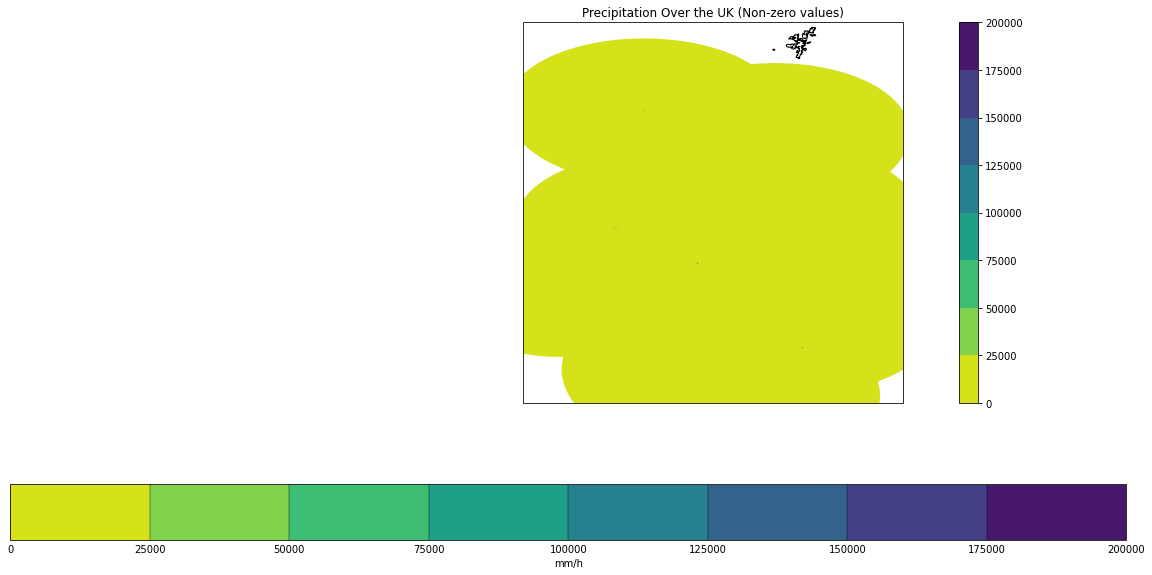

In [10]:
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy.ma as ma

# Load data
cube = accumulated_cube.copy()

# Mask out zeros
cube.data = ma.masked_equal(cube.data, 0)
# cube.data = np.ma.masked_where(cube.data < 5000, cube.data)

# Plotting
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 2, 49, 61], crs=ccrs.PlateCarree())  # Zoom in on the UK
ax.coastlines()

# Use Iris' quickplot for easy plotting
qplt.contourf(cube, cmap='viridis_r')  # Indexing [0] for the first time point, adjust as necessary
plt.title('Precipitation Over the UK (Non-zero values)')
plt.colorbar(orientation='vertical')
plt.show()

ax.coastlines()


In [19]:
# Calculate the mean and standard deviation
mean = accumulated_cube.data.mean()
std_dev = accumulated_cube.data.std()

# Compute z-scores
z_scores = (accumulated_cube.data - mean) / std_dev

# Identify outliers, e.g., where the z-score is greater than 3 or less than -3
outliers = np.abs(z_scores) > 3

KeyboardInterrupt: 

### Handle outliers

In [ ]:
# Get indices where there are outliers
outlier_indices = np.where(outliers)

# Optional: Print the locations and values of outliers
for index in zip(*outlier_indices):
    print(f"Outlier at index {index} with value {accumulated_cube.data[index]} and z-score {z_scores[index]}")
